<a href="https://colab.research.google.com/github/ehpub/KFQ_DL_2023-/blob/main/2023_kfq_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%84%B8%EA%B7%B8%EB%A9%98%ED%85%8C%EC%9D%B4%EC%85%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

참고 교재: https://www.gilbut.co.kr/book/view?bookcode=BN003496

In [ ]:
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz

--2023-07-20 00:25:27--  http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz [following]
--2023-07-20 00:25:27--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz [following]
--2023-07-20 00:25:27--  https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 301 Moved Perman

In [ ]:
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz

--2023-07-20 00:26:00--  http://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz [following]
--2023-07-20 00:26:01--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/~vgg/data/pets/annotations.tar.gz [following]
--2023-07-20 00:26:01--  https://thor.robots.ox.ac.uk/~vgg/data/pets/annotations.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting res

In [ ]:
!tar -xf images.tar.gz

In [ ]:
!tar -xf annotations.tar.gz

In [ ]:
import os
import numpy as np

In [ ]:
input_dir = "images"
target_dir = "annotations/trimaps"

In [ ]:
input_img_paths = []
for fname in os.listdir(input_dir):
  if fname.endswith(".jpg"):
    input_img_paths.append(os.path.join(input_dir,fname))
input_img_paths = sorted(input_img_paths)

In [ ]:
target_paths = []
for fname in os.listdir(target_dir):
  if fname.endswith(".png") and not fname.startswith('.'):
    target_paths.append(os.path.join(target_dir,fname))
target_paths = sorted(target_paths)

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img,img_to_array

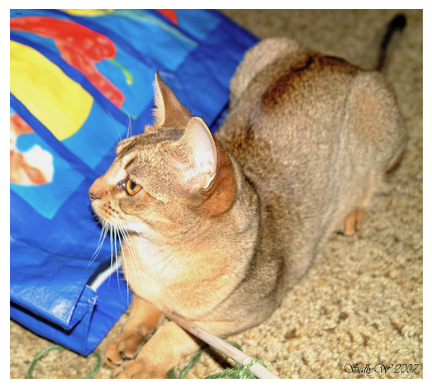

In [ ]:
plt.axis('off')
plt.imshow(load_img(input_img_paths[9]))
plt.show()

In [ ]:
def display_target(target_array):
  normalized_array = (target_array.astype('uint8')-1)*127
  plt.axis('off')
  plt.imshow(normalized_array[:,:,0])
  plt.show()

In [ ]:
import numpy as np

In [ ]:
img = img_to_array(load_img(target_paths[9],color_mode='grayscale'))
ta = (img.astype('uint8')-1)*127
np.unique(ta)

array([  0, 127, 254], dtype=uint8)

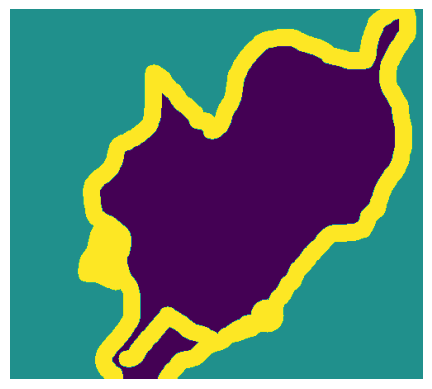

In [ ]:
img = img_to_array(load_img(target_paths[9],color_mode='grayscale'))
display_target(img)

In [ ]:
img.shape

(448, 500, 1)

In [ ]:
for r in range(45):
  for c in range(50):
    if(img[r*10,c*10,0] ==2):
      print('ㅁ',end='')
    else:
      print('  ',end='')
  print()

ㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁ        ㅁ
ㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁ            
ㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁ            
ㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁ          ㅁㅁㅁㅁㅁㅁㅁ              
ㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁ                    ㅁㅁㅁㅁ            ㅁ
ㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁ                          ㅁㅁ          ㅁㅁ
ㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁ                                        ㅁㅁ
ㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁ    ㅁㅁㅁㅁㅁㅁㅁㅁ                                        ㅁㅁㅁ
ㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁ      ㅁㅁㅁㅁㅁㅁㅁ                                        ㅁㅁㅁ
ㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁ        ㅁㅁㅁㅁㅁㅁ                                        ㅁㅁㅁ
ㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁ          ㅁㅁㅁㅁㅁ                                          ㅁㅁ
ㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁ            ㅁㅁㅁ                                              ㅁ
ㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁ              ㅁㅁ                                              ㅁ
ㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁ                                                                ㅁ
ㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁ  

In [ ]:
for r in range(45):
  for c in range(50):
    if(img[r*10,c*10,0] ==1):
      print('ㅁ',end='')
    else:
      print('  ',end='')
  print()

                                                                                                    
                                                                                                    
                                                                                            ㅁㅁ    
                                                                                          ㅁㅁ      
                                                                                          ㅁㅁ      
                                                              ㅁㅁㅁㅁ                    ㅁ        
                                                            ㅁㅁㅁㅁㅁㅁㅁㅁ              ㅁ        
                                                            ㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁ      ㅁ          
                                                          ㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁ          
                                                          ㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁ          
                                                      

In [ ]:
for r in range(45):
  for c in range(50):
    if(img[r*10,c*10,0] ==3):
      print('ㅁ',end='')
    else:
      print('  ',end='')
  print()

                                                                                          ㅁㅁㅁㅁ  
                                                                                        ㅁㅁㅁㅁㅁㅁ
                                                                                        ㅁㅁ    ㅁㅁ
                                                              ㅁㅁㅁㅁㅁ              ㅁㅁ    ㅁㅁㅁ
                                                          ㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁ        ㅁㅁ    ㅁㅁ  
                                                        ㅁㅁㅁ        ㅁㅁㅁㅁㅁㅁ    ㅁㅁ  ㅁㅁ    
                                                        ㅁㅁ                ㅁㅁㅁㅁㅁㅁㅁ  ㅁㅁ    
                                  ㅁㅁ                ㅁㅁㅁ                      ㅁㅁㅁ  ㅁㅁ      
                                  ㅁㅁㅁ              ㅁㅁ                                ㅁㅁ      
                                  ㅁㅁㅁㅁ            ㅁㅁ                                ㅁㅁ      
                                  ㅁㅁㅁㅁㅁ          ㅁㅁ                          

In [ ]:
import random

In [ ]:
img_size= (200,200)
num_imgs = len(input_img_paths)

In [ ]:
for _ in range(10):
  print(random.Random(100).random(),end=',')

0.1456692551041303,0.1456692551041303,0.1456692551041303,0.1456692551041303,0.1456692551041303,0.1456692551041303,0.1456692551041303,0.1456692551041303,0.1456692551041303,0.1456692551041303,

In [ ]:
for _ in range(10):
  print(random.Random(100).random(),end=',')

0.1456692551041303,0.1456692551041303,0.1456692551041303,0.1456692551041303,0.1456692551041303,0.1456692551041303,0.1456692551041303,0.1456692551041303,0.1456692551041303,0.1456692551041303,

In [ ]:
random.Random(1337).shuffle(input_img_paths)
random.Random(1337).shuffle(target_paths)

In [ ]:
def path_to_input_image(path):
  return img_to_array(load_img(path,target_size=img_size))

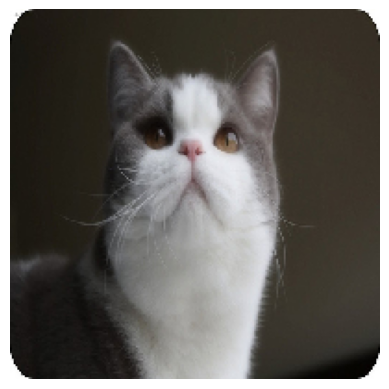

In [ ]:
s = path_to_input_image(input_img_paths[0])
s = s.astype('uint8')
plt.axis('off')
plt.imshow(s)
plt.show()

In [ ]:
def path_to_target(path):
  img = img_to_array(load_img(path,target_size=img_size,
                              color_mode='grayscale'))
  img = img.astype('uint8')-1
  return img

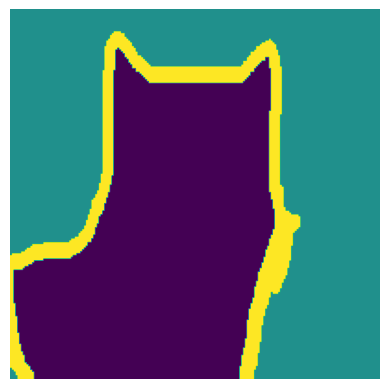

In [ ]:
s = path_to_target(target_paths[0])
plt.axis('off')
plt.imshow(s)
plt.show()

In [ ]:
input_imgs = np.zeros((num_imgs,)+img_size+(3,),dtype='float32')
input_imgs.shape

(7390, 200, 200, 3)

In [ ]:
np.unique(input_imgs)

array([0.], dtype=float32)

In [ ]:
targets = np.zeros((num_imgs,)+img_size+(1,),dtype='uint8')
targets.shape

(7390, 200, 200, 1)

In [ ]:
for i in range(num_imgs):
  input_imgs[i] = path_to_input_image(input_img_paths[i])
  targets[i] = path_to_target(target_paths[i])

In [ ]:
num_val_samples = 1000

In [ ]:
train_input_imgs = input_imgs[num_val_samples:]
train_targets = targets[num_val_samples:]

val_input_imgs = input_imgs[:num_val_samples]
val_targets = targets[:num_val_samples]

In [ ]:
from tensorflow import keras
from keras import layers

In [ ]:
def get_model(img_size,num_classes):
  inputs = keras.Input(shape=img_size+(3,))
  x = layers.Rescaling(1./255)(inputs)

  x = layers.Conv2D(64,3,strides=2,activation='relu',padding='same')(x)
  x = layers.Conv2D(64,3,activation='relu',padding='same')(x)
  x = layers.Conv2D(128,3,strides=2,activation='relu',padding='same')(x)
  x = layers.Conv2D(128,3,activation='relu',padding='same')(x)
  x = layers.Conv2D(256,3,strides=2,activation='relu',padding='same')(x)
  x = layers.Conv2D(256,3,activation='relu',padding='same')(x)

  x = layers.Conv2DTranspose(256,3,activation='relu',padding='same')(x)
  x = layers.Conv2DTranspose(256,3,strides=2,activation='relu',padding='same')(x)
  x = layers.Conv2DTranspose(128,3,activation='relu',padding='same')(x)
  x = layers.Conv2DTranspose(128,3,strides=2,activation='relu',padding='same')(x)
  x = layers.Conv2DTranspose(64,3,activation='relu',padding='same')(x)
  x = layers.Conv2DTranspose(64,3,strides=2,activation='relu',padding='same')(x)

  outputs = layers.Conv2D(num_classes,3,activation='softmax',padding='same')(x)

  model = keras.Model(inputs,outputs)
  return model

In [ ]:
model = get_model(img_size=img_size,num_classes=3)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 100, 100, 64)      1792      
                                                                 
 conv2d_8 (Conv2D)           (None, 100, 100, 64)      36928     
                                                                 
 conv2d_9 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 conv2d_10 (Conv2D)          (None, 50, 50, 128)       147584    
                                                                 
 conv2d_11 (Conv2D)          (None, 25, 25, 256)       2951

In [ ]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy)
mcp = keras.callbacks.ModelCheckpoint('oxford_segmentation.keras',
                                      save_best_only=True)
hist = model.fit(train_input_imgs,train_targets,
                 epochs=50,
                 callbacks=[mcp],
                 batch_size=64,
                 validation_data = (val_input_imgs,val_targets))

Epoch 1/50
100/100 [==============================] - 105s 792ms/step - loss: 0.9802 - val_loss: 0.8966
Epoch 2/50
100/100 [==============================] - 160s 2s/step - loss: 0.8873 - val_loss: 1.1320
Epoch 3/50
100/100 [==============================] - 61s 609ms/step - loss: 0.8560 - val_loss: 0.8282
Epoch 4/50
100/100 [==============================] - 59s 594ms/step - loss: 0.8136 - val_loss: 0.8998
Epoch 5/50
100/100 [==============================] - 59s 590ms/step - loss: 0.7808 - val_loss: 0.7370
Epoch 6/50
100/100 [==============================] - 61s 609ms/step - loss: 0.7722 - val_loss: 0.7398
Epoch 7/50
100/100 [==============================] - 61s 610ms/step - loss: 0.7570 - val_loss: 0.7567
Epoch 8/50
100/100 [==============================] - 59s 592ms/step - loss: 0.7528 - val_loss: 0.7850
Epoch 9/50
100/100 [==============================] - 60s 597ms/step - loss: 0.7248 - val_loss: 0.6747
Epoch 10/50
100/100 [==============================] - 60s 597ms/step - lo

In [ ]:
from keras.utils import array_to_img
from tensorflow import keras

In [ ]:
model = keras.models.load_model('oxford_segmentation.keras')

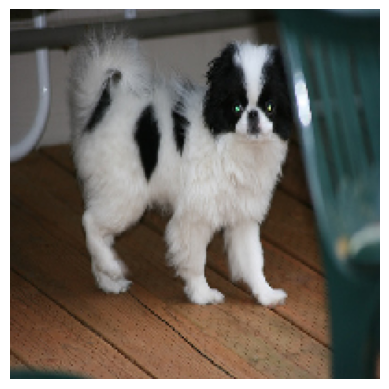

In [ ]:
test_image = val_input_imgs[4]
plt.axis('off')
plt.imshow(array_to_img(test_image))
plt.show()

In [ ]:
test_image.shape

(200, 200, 3)

In [ ]:
ti = test_image.reshape(1,200,200,3)
ti.shape

(1, 200, 200, 3)

In [ ]:
np.expand_dims(test_image,0).shape

(1, 200, 200, 3)

In [ ]:
mask = model.predict(np.expand_dims(test_image,0))[0]

1/1 [==============================] - 10s 10s/step


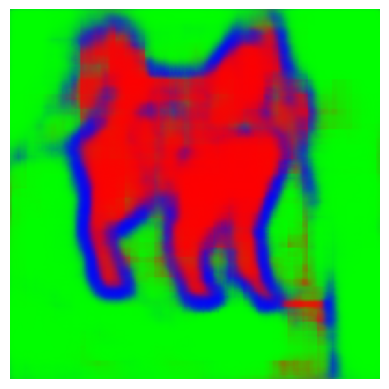

In [ ]:
plt.axis('off')
plt.imshow(mask)
plt.show()

In [ ]:
di = load_img('a.JPG',target_size=(200,200))
di

In [ ]:
di2 = path_to_input_image('a.JPG')
di2.shape

(200, 200, 3)

In [ ]:
di2 = di2.reshape(1,200,200,3)
mask = model.predict(di2)[0]
plt.imshow(mask)
plt.show()